In [1]:
import sys
import torch
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("../../../")
import manifold_flow as mf
from manifold_flow import transforms, utils, flows, distributions, training
from manifold_flow import nn as nn_

## Data

In [10]:
n = 1000
x0 = torch.randn(n).view(-1,1)
x1 = 0.5*(1.5 + x0)*(1.5-x0)

x = torch.cat([x0,x1],1)

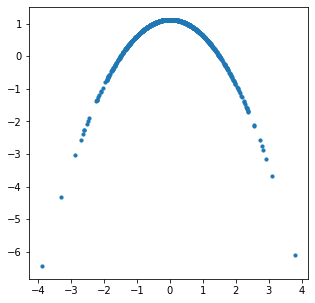

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(x0.numpy(), x1.numpy(), s=10.)
plt.show()

## Model

In [23]:
trf = transforms.AffineCouplingTransform(
    mask=utils.create_alternating_binary_mask(2, even=False),
    transform_net_create_fn=lambda in_features, out_features: nn_.ResidualNet(
        in_features=in_features,
        out_features=out_features,
        hidden_features=5,
        context_features=None,
        num_blocks=3,
        activation=torch.nn.functional.relu,
        dropout_probability=0,
        use_batch_norm=False,
    ),
)

In [24]:
flow = flows.autoencoding_flow.TwoStepAutoencodingFlow(
    data_dim=2,
    latent_dim=1,
    inner_transform=None,
    outer_transform=trf,
)

In [25]:
x_reco_before, log_prob_before, u_before = flow(x)

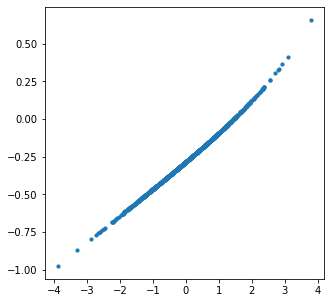

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(x_reco_before.detach().numpy()[:,0], x_reco_before.detach().numpy()[:,1], s=10.)
plt.show()

In [27]:
x_gen_before = flow.sample(n=1000)

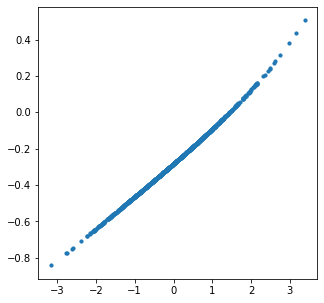

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(x_gen_before.detach().numpy()[:,0], x_gen_before.detach().numpy()[:,1], s=10.)
plt.show()

In [29]:
x_gen_before

tensor([[ 0.9171, -0.1089],
        [-1.8778, -0.6196],
        [-2.6226, -0.7500],
        ...,
        [ 1.4082, -0.0084],
        [ 1.7107,  0.0570],
        [ 0.7437, -0.1430]], grad_fn=<CopySlices>)